# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503272 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069168 Eh
E = -1.136928959400571 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154682491653277 Eh
E = -0.987392996293216 Eh
E = -0.9670259116093083 Eh
E = -0.9534242125062942 Eh
E = -0.9449089870950516 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283361 Eh
E = -0.9351960308386078 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411335862 Eh
E = -0.8397057843499789 Eh
E = -1.074887931719117 Eh
E = -1.1175258568986912 Eh
E = -1.0951595815644795 Eh
E = -1.0495617842752072 Eh
E = -0.9960202460350677 Eh
E = -0.9415475409906814 Eh
E = -0.8899750208893146 Eh
E = -0.8432718025417755 Eh
E = -0.8022428650141384 Eh
E = -0.7669825247359998 Eh
E = -0.7371545448988288 Eh
E = -0.7121961606082431 Eh
E = -0.6914700512624794 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436217 Eh
E = -0.8488985094851161 Eh
E = -1.0882310174307857 Eh
E = -1.1369333351418656 Eh
E = -1.1229593878059763 Eh
E = -1.0887606905920533 Eh
E = -1.050426089327126 Eh
E = -1.015441636439638 Eh
E = -0.9873692257052735 Eh
E = -0.9670168314563374 Eh
E = -0.9534301294889956 Eh
E = -0.9449225613845066 Eh
E = -0.9398332746700124 Eh
E = -0.9368793989542732 Eh
E = -0.9351989265367034 Eh


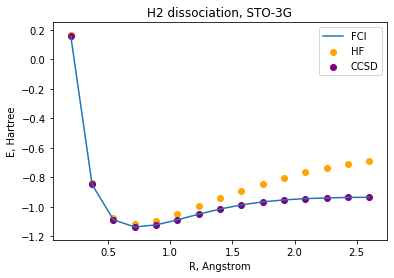

In [6]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [7]:
bond_lengths = np.linspace(0.5,2.7,15)

In [8]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998408 Eh
E = -74.47523205267994 Eh
E = -74.90413378058085 Eh
E = -75.01383133956638 Eh
E = -75.00356512166869 Eh
E = -74.95170869126753 Eh
E = -74.8921864821597 Eh
E = -74.83923063661472 Eh
E = -74.79866365936665 Eh
E = -74.77161515186873 Eh
E = -74.75568947216955 Eh
E = -74.74704715250577 Eh
E = -74.74248898749504 Eh
E = -74.74007426355803 Eh
Could not converge


In [9]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.1294816132027 Eh
E = -74.45343797012882 Eh
E = -74.87055361048274 Eh
E = -74.96308510923824 Eh
E = -74.92817508739554 Eh
E = -74.84281942863745 Eh
E = -74.74051950148719 Eh
E = -74.63577758413565 Eh
E = -74.5357663865733 Eh
E = -74.4449438474384 Eh
E = -74.36975504261737 Eh
E = -74.29778481417816 Eh
E = -74.24167220051008 Eh
E = -74.27129957697417 Eh
Could not converge


In [10]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.1427636391869 Eh
E = -74.47519485717146 Eh
E = -74.90406353010555 Eh
E = -75.01370018934803 Eh
E = -75.00330155818891 Eh
E = -74.95116757042632 Eh
E = -74.89128367467832 Eh
E = -74.8385340113911 Eh
E = -74.80070162375995 Eh
E = -74.78105738717322 Eh
E = -74.74394274756116 Eh
E = -74.77972801511778 Eh
E = -74.78338963453125 Eh
E = -74.64224434263167 Eh
Could not converge


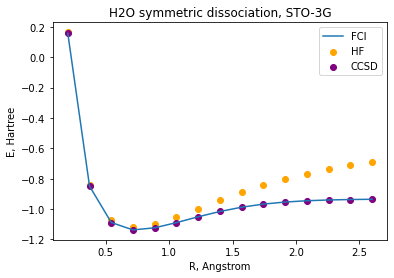

In [6]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

Now we apply FCI, HF, CCSD and CISD methods to obtain PES of two more molecules- LiH and N2 .

# LiH 

E = -7.050225036066642 Eh
E = -7.656973902520411 Eh
E = -7.838969178528296 Eh
E = -7.881561154690024 Eh
E = -7.8751477919332 Eh
E = -7.852601015611293 Eh
E = -7.828270603987061 Eh
E = -7.808887169919326 Eh
E = -7.796427577191666 Eh
E = -7.789498785374102 Eh
E = -7.0284717535917025 Eh
E = -7.638820884554587 Eh
E = -7.822285940972653 Eh
E = -7.8630437492307195 Eh
E = -7.850996833708848 Eh
E = -7.818585517832487 Eh
E = -7.7793236819497 Eh
E = -7.739449898210889 Eh
E = -7.702405275833109 Eh
E = -7.670202787852991 Eh
E = -7.050156294294409 Eh
E = -7.656967337737299 Eh
E = -7.838962124054423 Eh
E = -7.881550790015216 Eh
E = -7.875132825615624 Eh
E = -7.8525798705973875 Eh
E = -7.828236554861081 Eh
E = -7.808829722678409 Eh
E = -7.796341817405303 Eh
E = -7.789389227862769 Eh
E = -7.050084132098711 Eh
E = -7.65696340328409 Eh
E = -7.83896060108503 Eh
E = -7.881549595619722 Eh
E = -7.875131056835929 Eh
E = -7.852575070382767 Eh
E = -7.828228069508826 Eh
E = -7.8088191793482435 Eh
E = -7.7963311

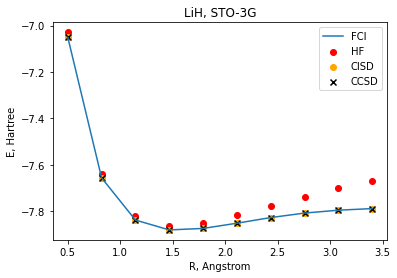

In [6]:
bond_lengths = np.linspace(0.5,3.4,10)

#using various methods to obtain PES for LiH
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')
CISD_PES = obtain_PES('lih', bond_lengths, basis,  method='cisd')



#plotting the data
plt.title('LiH, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='r')
plt.scatter(bond_lengths, CCSD_PES, label='CISD', marker='o',color='orange')
plt.scatter(bond_lengths, CISD_PES, label='CCSD',  marker='x', color='k')
plt.legend()

# N2

E = -103.9317326159464 Eh
E = -106.19514456320567 Eh
E = -107.17709480522055 Eh
E = -107.5607605748213 Eh
E = -107.67119581714377 Eh
E = -107.66534454763004 Eh
E = -107.61735151807443 Eh
E = -107.56129117531896 Eh
E = -107.51301935617232 Eh
E = -107.47911139742112 Eh
E = -107.4591955614225 Eh
E = -107.44899000073752 Eh
E = -107.4441077334922 Eh
E = -107.44172020050588 Eh
E = -107.44041650088208 Eh
CPU times: user 22.8 s, sys: 2.05 s, total: 24.9 s
Wall time: 36.1 s
E = -103.88092057889378 Eh
E = -106.1215911212332 Eh
E = -107.0776019608933 Eh
E = -107.42937915491319 Eh
E = -107.5006181276801 Eh
E = -107.44810224264307 Eh
E = -107.34619986288908 Eh
E = -107.2288540147922 Eh
E = -107.11129982734893 Eh
E = -107.00075763368834 Eh
E = -106.9008254500263 Eh
E = -106.81294488211661 Eh
E = -106.73705922097065 Eh
E = -106.6722319171396 Eh
E = -106.61720546931043 Eh
CPU times: user 17.7 s, sys: 1.64 s, total: 19.3 s
Wall time: 28.3 s
E = -103.93078902953744 Eh
E = -106.19300172659578 Eh
E = -107

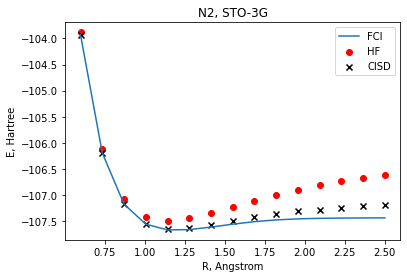

In [4]:
bond_lengths = np.linspace(0.6,2.5,15)

#using various methods to obtain PES for N2
%time FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')
%time HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')
#%time CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')
%time CISD_PES = obtain_PES('n2', bond_lengths, basis,  method='cisd')



#plotting the data
plt.title('N2, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='r')
#plt.scatter(bond_lengths, CCSD_PES, label='CISD', marker='o',color='orange')
plt.scatter(bond_lengths, CISD_PES, label='CISD',  marker='x', color='k')
plt.legend()